In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [9]:
# data from kaggle spam data https://www.kaggle.com/uciml/sms-spam-collection-dataset/version/1
# encoding ='ISO-8859-1': csv contains invalid characters (non-standard symbols like emojis)
df = pd.read_csv('spam.csv', encoding ='ISO-8859-1')
# drop unecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
# rename columns
df.columns = ['labels', 'data']

In [14]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
# Y = df['b_labels'].asmatrix() same as values
Y = df['b_labels'].values

Create Features Method 1

In [22]:
count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])

Create Features Method 2

In [21]:
tfidf = TfidfVectorizer(decode_error='ignore')
X = tfidf.fit_transform(df['data'])

In [25]:
# split data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.33)

In [26]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score", model.score(Xtrain, Ytrain))
print("test score", model.score(Xtest, Ytest))

train score 0.994642378784
test score 0.979880369766


In [28]:
# visualize the data
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

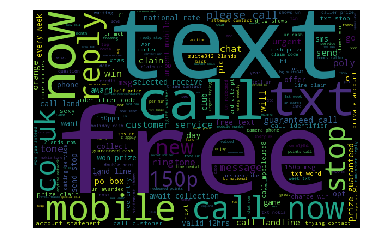

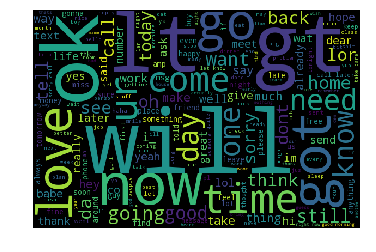

In [29]:
visualize('spam')
visualize('ham')

In [30]:
# see what we are getting wrong
df['predictions'] = model.predict(X)

In [31]:
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']

In [34]:
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/minMobsmoreLKPOBOX177HP51FL
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Ot